## Mini Project III

# mini-project-III
Repo with the instructions for the Mini Project III.


### Topics
This mini project is dedicated to following topics:
- Data Wrangling
- Data Visualization
- Data Preparation and Feature Engineering
- Dimensionality Reduction
- Unsupervised Learning

### Data
We will be using old data about different financial transactions. You can download the data from [here](https://drive.google.com/file/d/1zAjnf936aHkwVCq_BmA47p4lpRjyRzMf/view?usp=sharing). The data contains following tables:

- twm_customer - information about customers
- twm_accounts - information about accounts
- twm_checking_accounts - information about checking accounts (subset of twm_accounts)
- twm_credit_accounts - information about checking accounts (subset of twm_accounts)
- twm_savings_accounts - information about checking accounts (subset of twm_accounts)
- twm_transactions - information about financial transactions
- twm_savings_tran - information about savings transactions (subset of twm_transactions)
- twm_checking_tran - information about savings transactions (subset of twm_transactions)
- twm_credit_tran - information about credit checking (subset of twm_transactions)


### Output

In this miniproject, we will:

1.  create two separate customer segmentations (using clustering) to split them into 3-5 clusters: 
    - based on demographics (only on the information from twm_customer)
    - based on their banking behavior. We can take following things into consideration as banking behavior:
        - do they have savings account? How much do they save?
        - do they have credit account? How much do they live in debt?
        - are they making lot of small transactions or few huge ones?
2. visualize the created clusters using [radar charts](https://plotly.com/python/radar-chart/) and compare them agains each other
3. visualize segmentations using scatter plot. We will have to use PCA to be able to plot our observations in 2D.
4. (stretch) visualize in 2D how our clusters are evolving in each iteration of KMeans (for at least 20 iterations).
    - we will need to create own implementation of kmeans so we can see what is happening with the clusters during the iterations.


In [166]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from functools import reduce
from sklearn import preprocessing

In [167]:
twm_accounts = pd.read_csv('twm_accounts.csv',sep=';')
twm_checking_acct = pd.read_csv('twm_checking_acct.csv',sep=';')
twm_checking_tran = pd.read_csv('twm_checking_tran.csv',sep=';')
twm_credit_acct = pd.read_csv('twm_credit_acct.csv',sep=';')
twm_credit_tran = pd.read_csv('twm_credit_tran.csv',sep=';')
twm_customer = pd.read_csv('twm_customer.csv',sep=';')
twm_savings_acct = pd.read_csv('twm_savings_acct.csv',sep=';')
twm_savings_tran = pd.read_csv('twm_savings_tran.csv',sep=';')
twm_transactions = pd.read_csv('twm_transactions.csv',sep=';')

# CUSTOMER INCOME

In [168]:
twm_customer

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742,1363324,14795,36,6,1,F,4,,Lillian ...,Kaufman ...,9677,B ...,90016,Los Angeles,CA
743,1362895,26387,56,6,1,M,2,,Marty ...,McSherry ...,3227,Inspiration ...,10126,New York City,NY
744,1362569,61300,50,0,2,M,2,,Ken ...,Lawrence ...,6082,23rd ...,87194,Albuquerque,NM
745,1363364,15100,37,7,0,F,2,,Debbie ...,Runner ...,7851,H ...,35241,Birmingham,AL


In [169]:
customer = twm_customer.copy()
customer = customer[['cust_id', 'income']]
customer

,cust_id,income
0,1362691,26150
1,1362487,6605
2,1363160,18548
3,1362752,47668
4,1362548,44554
...,...,...
742,1363324,14795
743,1362895,26387
744,1362569,61300
745,1363364,15100


# CREDIT BALANCE

In [170]:
twm_credit_acct

,cust_id,acct_nbr,credit_limit,credit_rating,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,4561143213631600,1000,0,Y,12.10.1988,NaN,657.46,286.69
1,1362487,4561143213624870,3000,0,Y,8.8.1995,NaN,0.00,1548.23
2,1362548,4561143213625480,6700,0,Y,11.11.1986,NaN,6965.25,68.68
3,1362752,4561143213627520,2400,0,N,9.10.1994,2.4.1995,2302.14,0.00
4,1363017,4561143213630170,1000,0,Y,8.2.1995,NaN,0.00,1000.00
...,...,...,...,...,...,...,...,...,...
463,1363364,4561143213633640,3000,0,N,23.11.1989,23.7.1995,1783.86,1785.97
464,1363467,4561143213634670,1500,0,Y,30.6.1993,NaN,1193.89,1500.00
465,1363263,4561143213632630,3000,0,Y,29.3.1995,NaN,0.00,1218.94
466,1362569,4561143213625690,9200,0,Y,6.12.1995,NaN,0.00,9200.00


In [171]:
credit_acc = twm_credit_acct.copy()

In [172]:
credit_acc['Credit Balance'] = (credit_acc['credit_limit'] - credit_acc['ending_balance'])
credit_acc = credit_acc[['cust_id','credit_limit', 'ending_balance','Credit Balance']]
credit_acc

,cust_id,credit_limit,ending_balance,Credit Balance
0,1363160,1000,286.69,713.31
1,1362487,3000,1548.23,1451.77
2,1362548,6700,68.68,6631.32
3,1362752,2400,0.00,2400.00
4,1363017,1000,1000.00,0.00
...,...,...,...,...
463,1363364,3000,1785.97,1214.03
464,1363467,1500,1500.00,0.00
465,1363263,3000,1218.94,1781.06
466,1362569,9200,9200.00,0.00


# SAVINGS BALANCE

In [173]:
twm_savings_acct

,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35
...,...,...,...,...,...,...,...,...,...
416,1363141,13631413,100,BS,Y,11.11.1994,NaN,177.33,528.57
417,1363038,13630383,100,BS,Y,20.2.1995,NaN,333.53,508.26
418,1362529,13625293,100,BS,Y,15.11.1992,NaN,662.06,873.14
419,1362895,13628953,100,BS,Y,27.6.1995,NaN,169.96,96.25


In [174]:
savings = twm_savings_acct.copy()
savings = savings[['cust_id','ending_balance']]

In [175]:
savings.rename(columns={'ending_balance': 'Savings Balance'},inplace = True)
savings

,cust_id,Savings Balance
0,1363160,122.54
1,1362487,12.89
2,1362548,254.02
3,1362752,609.33
4,1363017,2901.35
...,...,...
416,1363141,528.57
417,1363038,508.26
418,1362529,873.14
419,1362895,96.25


In [176]:
twm_checking_acct

,cust_id,acct_nbr,minimum_balance,per_check_fee,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1362548,13625482,3000,0.00,Y,11.11.1986,NaN,6004.34,569.65
1,1362487,13624872,3000,0.00,Y,12.1.1995,NaN,2781.07,1401.21
2,1363017,13630172,3000,0.00,Y,19.3.1994,NaN,2694.91,147.15
3,1362752,13627522,100,0.15,Y,8.1.1994,NaN,487.69,3.76
4,1363282,13632822,100,0.15,Y,5.3.1988,NaN,133.90,84.18
...,...,...,...,...,...,...,...,...,...
515,1363467,13634672,3000,0.00,Y,15.1.1995,NaN,4155.98,58.47
516,1362855,13628552,200,0.15,Y,2.9.1994,NaN,202.30,1070.87
517,1363324,13633242,3000,0.00,Y,25.8.1994,NaN,4010.41,2325.37
518,1362569,13625692,200,0.15,Y,6.4.1995,NaN,927.07,46.48


In [177]:
chequing = twm_checking_acct.copy()

chequing = chequing[['cust_id','ending_balance']]
chequing.rename(columns={'ending_balance': 'Chequing Balance'},inplace = True)
chequing

,cust_id,Chequing Balance
0,1362548,569.65
1,1362487,1401.21
2,1363017,147.15
3,1362752,3.76
4,1363282,84.18
...,...,...
515,1363467,58.47
516,1362855,1070.87
517,1363324,2325.37
518,1362569,46.48


In [178]:
a = pd.merge(customer,savings,on='cust_id')
b = pd.merge(a,chequing, on ='cust_id')
b['Total Asset'] = b['Savings Balance'] + b['Chequing Balance']
report = pd.merge(b,credit_acc, on ='cust_id')
report.rename(columns={'ending_balance': 'Owing Balance', 'credit_limit':'Credit Limit'},inplace = True)
report.fillna(0)
report

,cust_id,income,Savings Balance,Chequing Balance,Total Asset,Credit Limit,Owing Balance,Credit Balance
0,1362487,6605,12.89,1401.21,1414.10,3000,1548.23,1451.77
1,1362752,47668,609.33,3.76,613.09,2400,0.00,2400.00
2,1362548,44554,254.02,569.65,823.67,6700,68.68,6631.32
3,1363017,0,2901.35,147.15,3048.50,1000,1000.00,0.00
4,1362609,1929,49.39,15.38,64.77,3000,3000.00,0.00
...,...,...,...,...,...,...,...,...
247,1362815,0,348.98,816.60,1165.58,1000,1000.00,0.00
248,1363284,36614,860.93,946.08,1807.01,1800,965.92,834.08
249,1362529,43829,873.14,1007.92,1881.06,2200,433.43,1766.57
250,1362508,9802,255.11,75.11,330.22,3000,1072.17,1927.83


# scale

In [179]:
features = ['income','Savings Balance', 'Chequing Balance','Owing Balance']
scaler = StandardScaler(with_mean=False).fit_transform(report[features])
scaled_df = pd.DataFrame(scaler, columns=features)
scaled_df

,income,Savings Balance,Chequing Balance,Owing Balance
0,0.317931,0.005612,1.367966,1.410684
1,2.294495,0.265302,0.003671,0.000000
2,2.144603,0.110600,0.556135,0.062578
3,0.000000,1.263246,0.143659,0.911160
4,0.092852,0.021504,0.015015,2.733479
...,...,...,...,...
247,0.000000,0.151946,0.797226,0.911160
248,1.762412,0.374848,0.923634,0.880107
249,2.109705,0.380165,0.984007,0.394924
250,0.471818,0.111075,0.073328,0.976918


In [180]:
# elbow rule function
def elbow(df):
    distortions = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i,
                    n_init=10,
                    random_state=0)
        km.fit(df)
        distortions.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(range(1,11), distortions, marker='o')
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Distortion')
    ax.set_title('Elbow method')
    plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



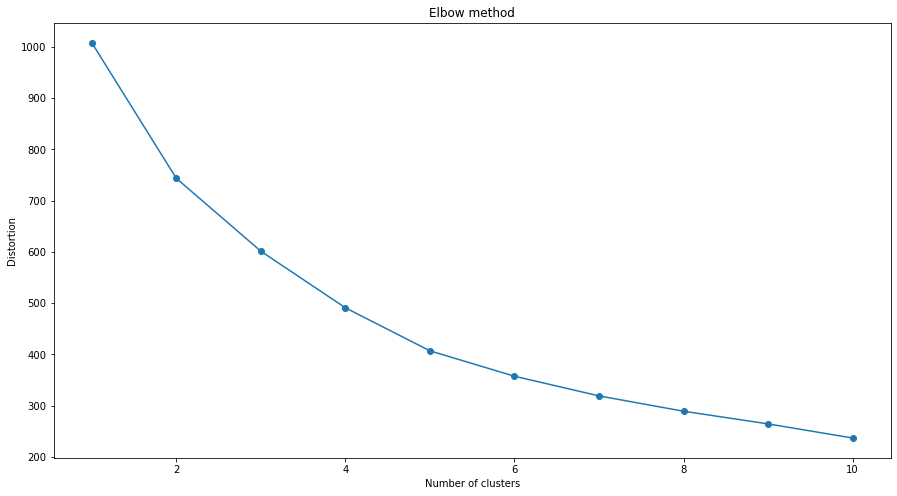

In [181]:
elbow(scaled_df)

In [182]:
import plotly.graph_objects as go

scaled_df['cluster'] = KMeans(n_clusters=4, n_init=10).fit_predict(scaled_df)

scaled_df['cluster'].value_counts()

df_radar = scaled_df.groupby('cluster').mean().divide(scaled_df.drop('cluster',axis=1).mean())*100

def plot_radar_chart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster_{df.index[i]}',
                                    fill = 'toself'))
    # mean line
    data.append(go.Scatterpolar(r = [100]* df.shape[1],
                                theta= df.columns,
                                name = 'mean',
                                fill = 'toself'))
    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()
plot_radar_chart(df_radar)


In [183]:
df_radar.head()

,income,Savings Balance,Chequing Balance,Owing Balance
cluster,,,,
0,65.718876,64.855794,54.737969,66.172486
1,273.426293,1027.968260,173.774825,73.462579
2,178.743623,86.561012,69.122096,237.816500
3,164.239735,142.989767,415.525876,117.722070


In [184]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
PCA_transform = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(PCA_transform, columns = ['PC1', 'PC2'])
df_pca['cluster'] = scaled_df['cluster']

In [185]:
df_pca.head(20)

,PC1,PC2,cluster
0,-0.477804,-0.639555,0
1,-0.593842,0.650484,0
2,-0.437524,0.482773,0
3,-1.007574,0.505454,0
4,0.530488,-1.883020,2
5,-1.006898,-0.264548,0
6,-1.267301,-0.440988,0
7,-0.608077,0.552653,0
8,2.003469,-0.594553,3
9,-0.243909,-0.152716,0


In [186]:
def plot_PCA(df):
    data = []
    for cluster in df.cluster.unique():
        to_plot = df[df['cluster'] == cluster]
        data.append(go.Scatter(x=to_plot['PC1'], 
                               y=to_plot['PC2'], 
                               mode='markers', name = f'cluster_{cluster}'))
    layout = go.Layout(title="PCA",
                       xaxis_title="PC1",
                       yaxis_title="PC2",)
    fig = go.Figure(data=data,layout=layout)
    fig.show()


In [187]:
plot_PCA(df_pca)

# Kmeans

In [188]:
km = KMeans(n_clusters=4,
            n_init=10, 
            random_state=0)

In [189]:
y_km = km.fit_predict(df_pca)

In [196]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='yellow',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

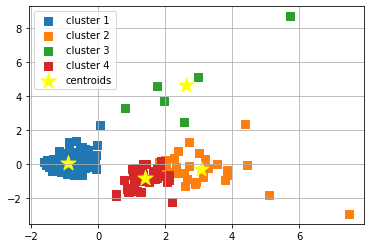

In [197]:
plot_clusters(PCA_transform, y_km+1, plt_cluster_centers= True)

In [192]:
scaled_df['cluster'] = y_km+1

scaled_df.head(100)

,income,Savings Balance,Chequing Balance,Owing Balance,cluster
0,0.317931,0.005612,1.367966,1.410684,1
1,2.294495,0.265302,0.003671,0.000000,1
2,2.144603,0.110600,0.556135,0.062578,1
3,0.000000,1.263246,0.143659,0.911160,1
4,0.092852,0.021504,0.015015,2.733479,4
...,...,...,...,...,...
95,1.307103,0.690356,5.517320,0.453812,2
96,0.736512,0.024853,0.093527,0.391197,1
97,1.269029,0.060956,1.156652,0.550933,1
98,2.899743,0.258122,0.574040,0.645283,4


In [193]:
scaled_df.info

<bound method DataFrame.info of        income  Savings Balance  Chequing Balance  Owing Balance  cluster
0    0.317931         0.005612          1.367966       1.410684        1
1    2.294495         0.265302          0.003671       0.000000        1
2    2.144603         0.110600          0.556135       0.062578        1
3    0.000000         1.263246          0.143659       0.911160        1
4    0.092852         0.021504          0.015015       2.733479        4
..        ...              ...               ...            ...      ...
247  0.000000         0.151946          0.797226       0.911160        1
248  1.762412         0.374848          0.923634       0.880107        1
249  2.109705         0.380165          0.984007       0.394924        1
250  0.471818         0.111075          0.073328       0.976918        1
251  1.761978         0.221296          0.448140       1.640087        4

[252 rows x 5 columns]>

In [194]:
scaled_copy = scaled_df.copy()
scaled_copy

,income,Savings Balance,Chequing Balance,Owing Balance,cluster
0,0.317931,0.005612,1.367966,1.410684,1
1,2.294495,0.265302,0.003671,0.000000,1
2,2.144603,0.110600,0.556135,0.062578,1
3,0.000000,1.263246,0.143659,0.911160,1
4,0.092852,0.021504,0.015015,2.733479,4
...,...,...,...,...,...
247,0.000000,0.151946,0.797226,0.911160,1
248,1.762412,0.374848,0.923634,0.880107,1
249,2.109705,0.380165,0.984007,0.394924,1
250,0.471818,0.111075,0.073328,0.976918,1


In [198]:
import seaborn as sns

<AxesSubplot:xlabel='cluster', ylabel='Owing Balance'>

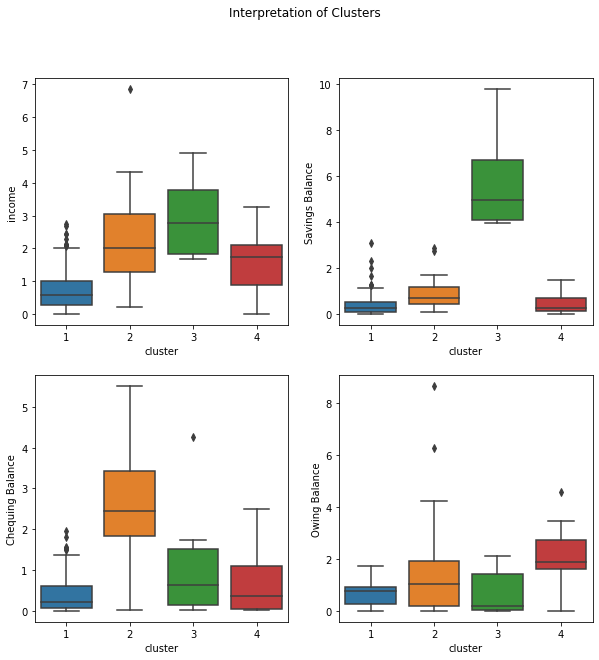

In [207]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

fig.suptitle('Interpretation of Clusters')

sns.boxplot(ax=axes[0, 0], data=scaled_copy, x='cluster', y='income')
sns.boxplot(ax=axes[0, 1], data=scaled_copy, x='cluster', y='Savings Balance')
sns.boxplot(ax=axes[1, 0], data=scaled_copy, x='cluster', y='Chequing Balance')
sns.boxplot(ax=axes[1, 1], data=scaled_copy, x='cluster', y='Owing Balance')